## GO term tokens

could you do me a favor and check if these words are common in the dataset:
transporter
carrier family protein
toxin
oxidoreductase
efflux carrier
response regulator
transcriptional regulator
membrane transport protein

## Imports

In [18]:
import os
import numpy as np
import pandas as pd
from Bio import SeqIO
from collections import defaultdict, Counter
from joblib import Parallel, delayed
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, top_k_accuracy_score, precision_score, recall_score, 
    f1_score, log_loss, hamming_loss, classification_report, confusion_matrix
)
from sklearn.utils import resample
from datasets import Dataset, load_from_disk


### Load Data

In [2]:
data_path = os.path.join("..","data","train_val_GO")

absolute_path = os.path.abspath(data_path)

print(absolute_path)

C:\Users\49176\Unistuff\PP2\prostT5-CLIP\data\train_val_GO


In [4]:

dataset= load_from_disk(absolute_path)

In [27]:
dataset

DatasetDict({
    train: Dataset({
        features: ['identifier', 'term', 'aspect', 'GO Name', 'GO Sentence', 'sequence', 'species', '__index_level_0__'],
        num_rows: 4299428
    })
    test: Dataset({
        features: ['identifier', 'term', 'aspect', 'GO Name', 'GO Sentence', 'sequence', 'species', '__index_level_0__'],
        num_rows: 1064435
    })
})

In [16]:

dataset["train"][6]

{'identifier': 'A0A009IHW8',
 'term': 'GO:0044237',
 'aspect': 'BPO',
 'GO Name': 'cellular metabolic process',
 'GO Sentence': 'The biological process is cellular metabolic process.',
 'sequence': 'MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR',
 'species': 'Acinetobacter baumannii ',
 '__index_level_0__': 6}

In [14]:
len(all_terms)

5363863

In [28]:

# Convert train and test datasets to pandas DataFrames with the specified columns
train_df = dataset['train'].to_pandas()[['identifier', 'GO Name']]
train_df['test_or_train'] = 'train'

test_df = dataset['test'].to_pandas()[['identifier', 'GO Name']]
test_df['test_or_train'] = 'test'

# Combine train and test DataFrames
combined_df = pd.concat([train_df, test_df], ignore_index=True)

# Reorder columns to match specified order
combined_df = combined_df[['identifier', 'test_or_train', 'GO Name']]

# Display or print the resulting DataFrame
print(combined_df)

         identifier test_or_train  \
0        A0A009IHW8         train   
1        A0A009IHW8         train   
2        A0A009IHW8         train   
3        A0A009IHW8         train   
4        A0A009IHW8         train   
...             ...           ...   
5363858      X5KCU9          test   
5363859      X5KCU9          test   
5363860      X5KCU9          test   
5363861      X5KCU9          test   
5363862      X5KCU9          test   

                                                  GO Name  
0                                       metabolic process  
1        nucleobase-containing compound catabolic process  
2            purine-containing compound catabolic process  
3            cellular nitrogen compound catabolic process  
4                  nucleoside phosphate metabolic process  
...                                                   ...  
5363858                            monooxygenase activity  
5363859                      steroid hydroxylase activity  
5363860        

Text(0.5, 1.0, 'Top 30 GO terms CAFA 5 training set')

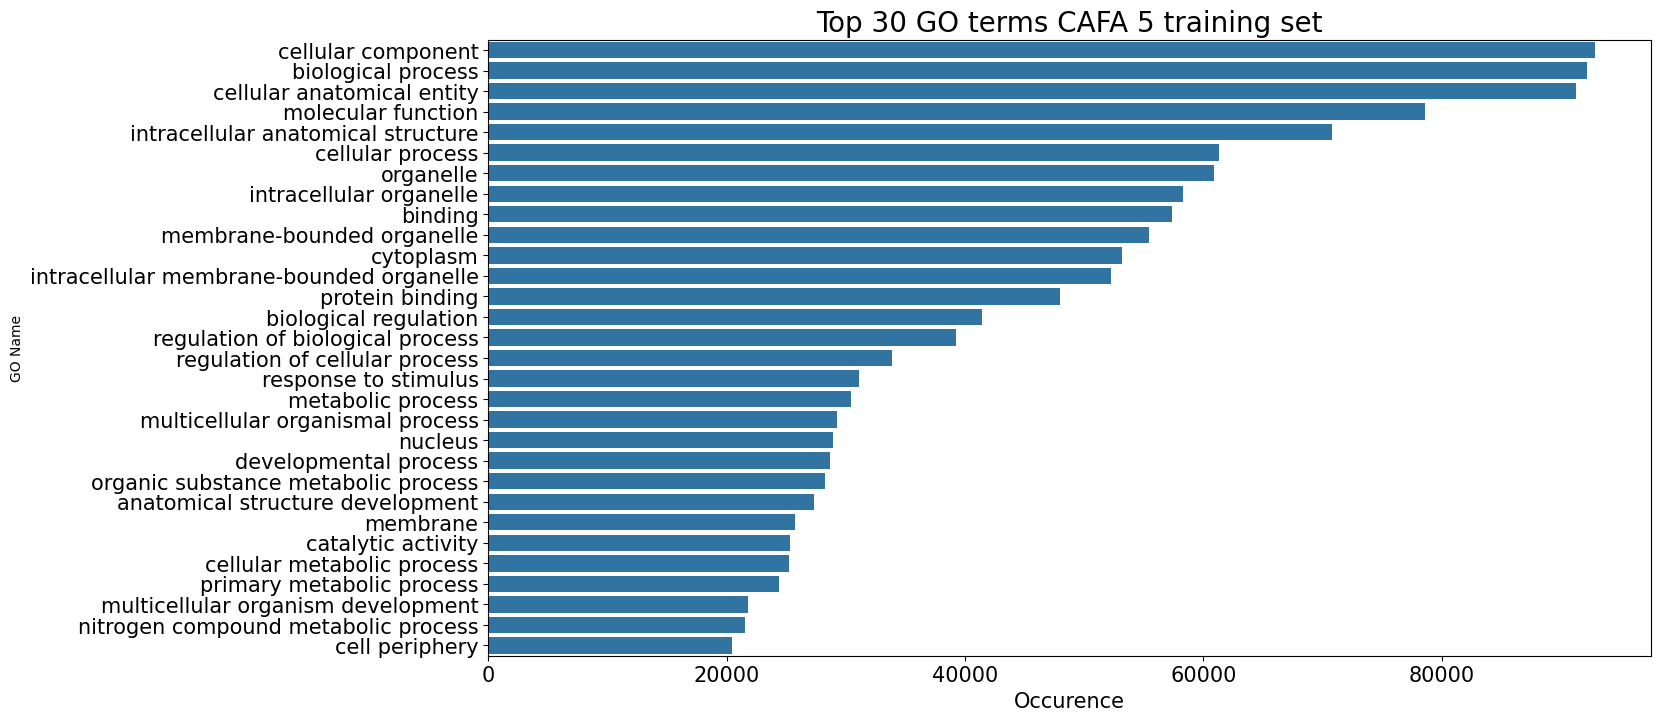

In [35]:
counts=combined_df["GO Name"].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(counts[:30],orient="h")
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel("Occurence",fontsize=15)
plt.title("Top 30 GO terms CAFA 5 training set",fontsize=20)

In [44]:
keywords = [
    'transporter', 'carrier', 'toxin', 
    'oxidoreductase', 'efflux carrier', 
    'response regulator', 'transcription regulator', 
    'membrane transport'
]


# Initialize lists to store the results
summary_data = []

# Iterate over each keyword to calculate occurrences in train and test sets
for keyword in keywords:
    # For train set
    occ_train = combined_df[(combined_df["test_or_train"] == "train") & (combined_df["GO Name"].str.contains(keyword, case=False))]
    total_occ_train = len(occ_train)
    unique_occ_train = len(occ_train['identifier'].unique())
    num_cat_train = len(occ_train["GO Name"].unique())
    
    # For test set
    occ_test = combined_df[(combined_df["test_or_train"] == "test") & (combined_df["GO Name"].str.contains(keyword, case=False))]
    total_occ_test = len(occ_test)
    unique_occ_test = len(occ_test['identifier'].unique())
    num_cat_test = len(occ_test["GO Name"].unique())
    
    # Append results to the summary list
    summary_data.append({
        'Keyword': keyword,
        'Total Occurrences Train': total_occ_train,
        'Unique Identifiers Train': unique_occ_train,
        'Unique GO Names Train': num_cat_train,
        'Total Occurrences Test': total_occ_test,
        'Unique Identifiers Test': unique_occ_test,
        'Unique GO Names Test': num_cat_test
    })

# Convert the summary list into a pandas DataFrame
summary_df = pd.DataFrame(summary_data)


In [46]:
summary_df

,Keyword,Total Occurrences Train,Unique Identifiers Train,Unique GO Names Train,Total Occurrences Test,Unique Identifiers Test,Unique GO Names Test
0,transporter,39053,4555,483,9969,1185,348
1,carrier,437,257,35,114,64,23
2,toxin,1062,489,36,283,124,24
3,oxidoreductase,10893,4123,119,2850,1084,94
4,efflux carrier,3,3,1,0,0,0
5,response regulator,26,26,1,12,12,1
6,transcription regulator,8105,4507,20,1990,1109,15
7,membrane transport,46874,5259,633,11773,1341,464


In [47]:


# Assuming combined_df is your DataFrame with "identifier", "test_or_train", and "GO Name"

# Step 1: Split "GO Name" into individual words
# This creates a Series of lists of tokens for each GO Name
combined_df['tokens'] = combined_df['GO Name'].str.split()

# Step 2: Explode the tokens into separate rows, retaining "test_or_train"
# This will give each token its own row with the corresponding "test_or_train" label
tokenized_df = combined_df.explode('tokens')[['test_or_train', 'tokens']]

# Step 3: Rename columns for clarity
tokenized_df.columns = ['test_or_train', 'token']

# Display the resulting DataFrame
print(tokenized_df)


        test_or_train                  token
0               train              metabolic
0               train                process
1               train  nucleobase-containing
1               train               compound
1               train              catabolic
...               ...                    ...
5363861          test           testosterone
5363861          test     6-beta-hydroxylase
5363861          test               activity
5363862          test         oxidoreductase
5363862          test               activity

[17723636 rows x 2 columns]


In [49]:
counts_token = tokenized_df.value_counts()

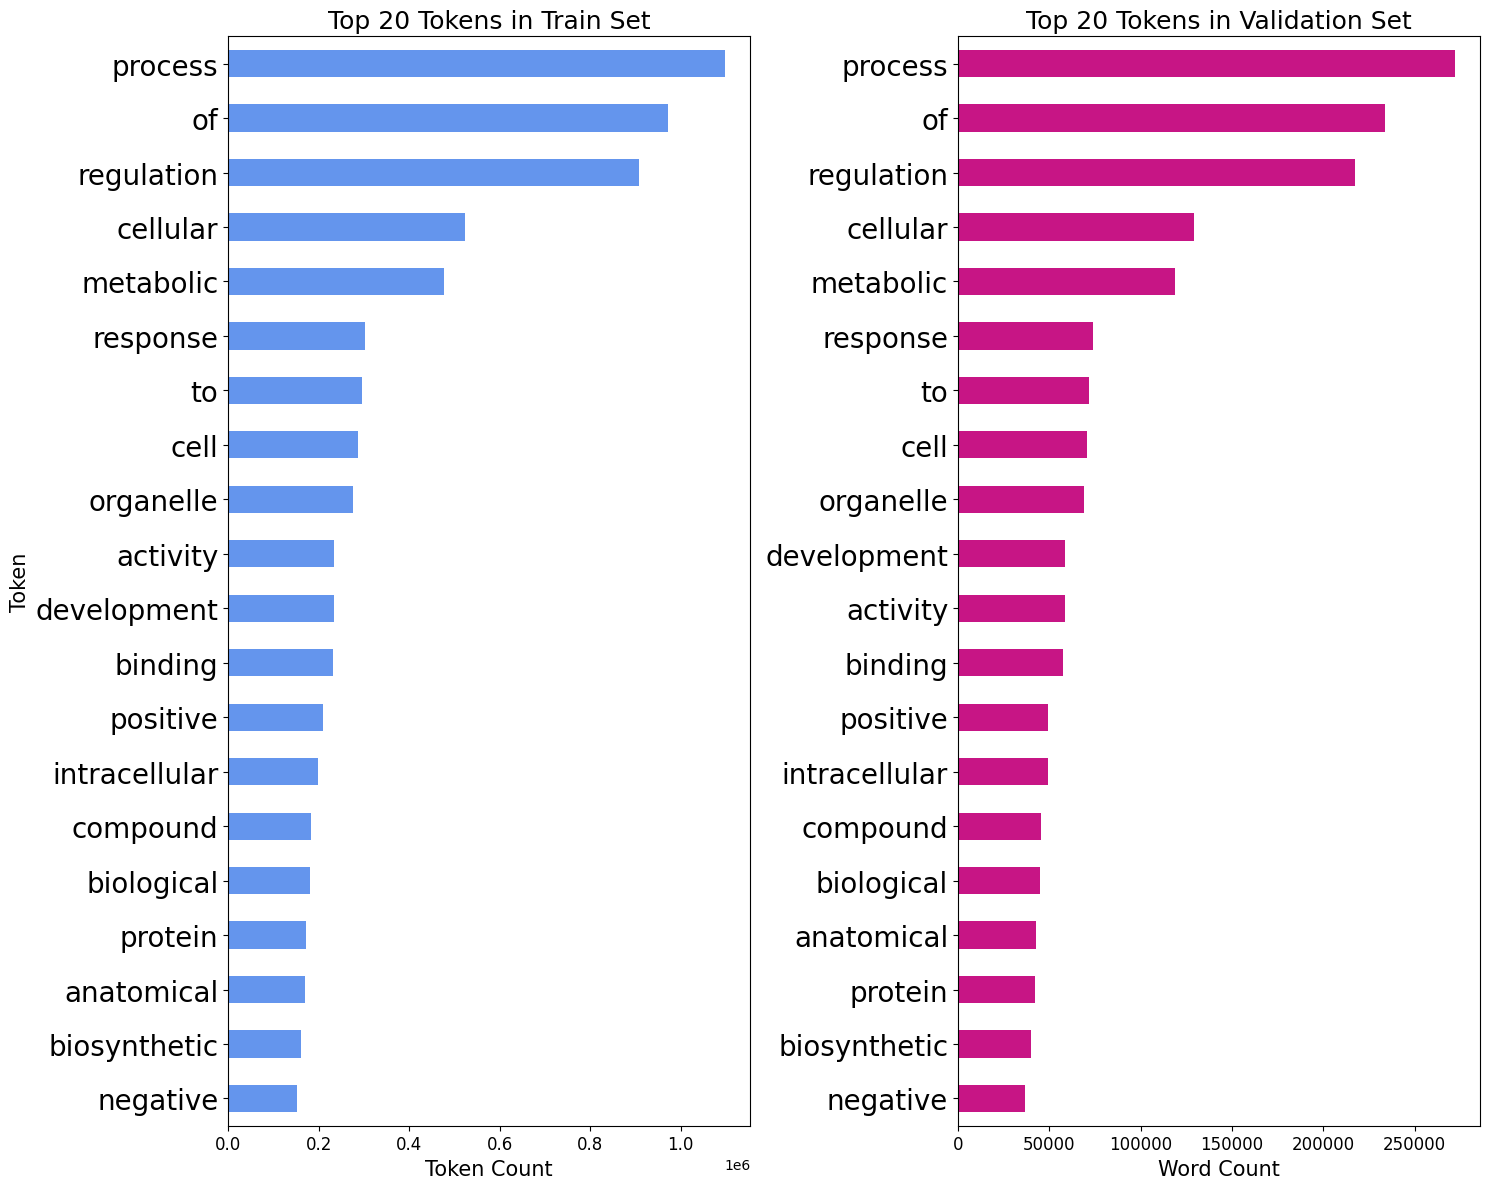

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Count occurrences of each token, separated by "test_or_train"
counts_token = tokenized_df.groupby(['test_or_train', 'token']).size().unstack(fill_value=0)

# Get the top 20 tokens in the train set and sort them in descending order
top_train_tokens = counts_token.loc['train'].sort_values(ascending=False).head(20)

# Get the top 20 tokens in the test set and sort them in descending order
top_test_tokens = counts_token.loc['test'].sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(15, 12))

# Plot for Train set
plt.subplot(1, 2, 1)
top_train_tokens.sort_values(ascending=True).plot(kind='barh', color='cornflowerblue')
plt.title("Top 20 Tokens in Train Set", fontsize=18)
plt.xlabel("Token Count", fontsize=15)
plt.ylabel("Token", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

# Plot for Test set
plt.subplot(1, 2, 2)
top_test_tokens.sort_values(ascending=True).plot(kind='barh', color='mediumvioletred')
plt.title("Top 20 Tokens in Validation Set", fontsize=18)
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()


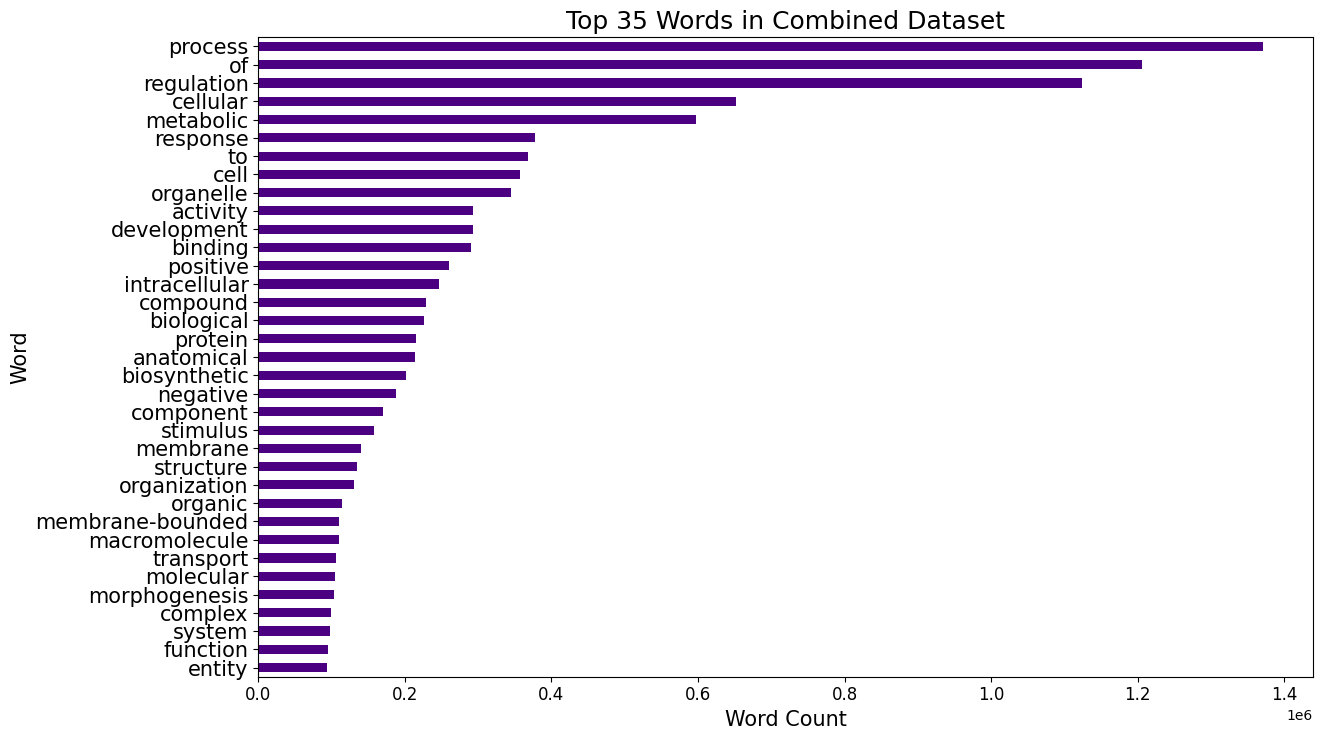

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine train and test counts by summing them across the dataset
# Sum counts across the 'test_or_train' level
total_counts = counts_token.sum(axis=0).sort_values(ascending=False)

# Get the top 50 words across the entire dataset
top_50_words = total_counts.head(35)

# Plotting
plt.figure(figsize=(13.33, 7.5))


# Plot for the top 50 words in the combined dataset
top_50_words.sort_values(ascending=True).plot(kind='barh', color="indigo")
plt.title("Top 35 Words in Combined Dataset", fontsize=18)
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Word", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()


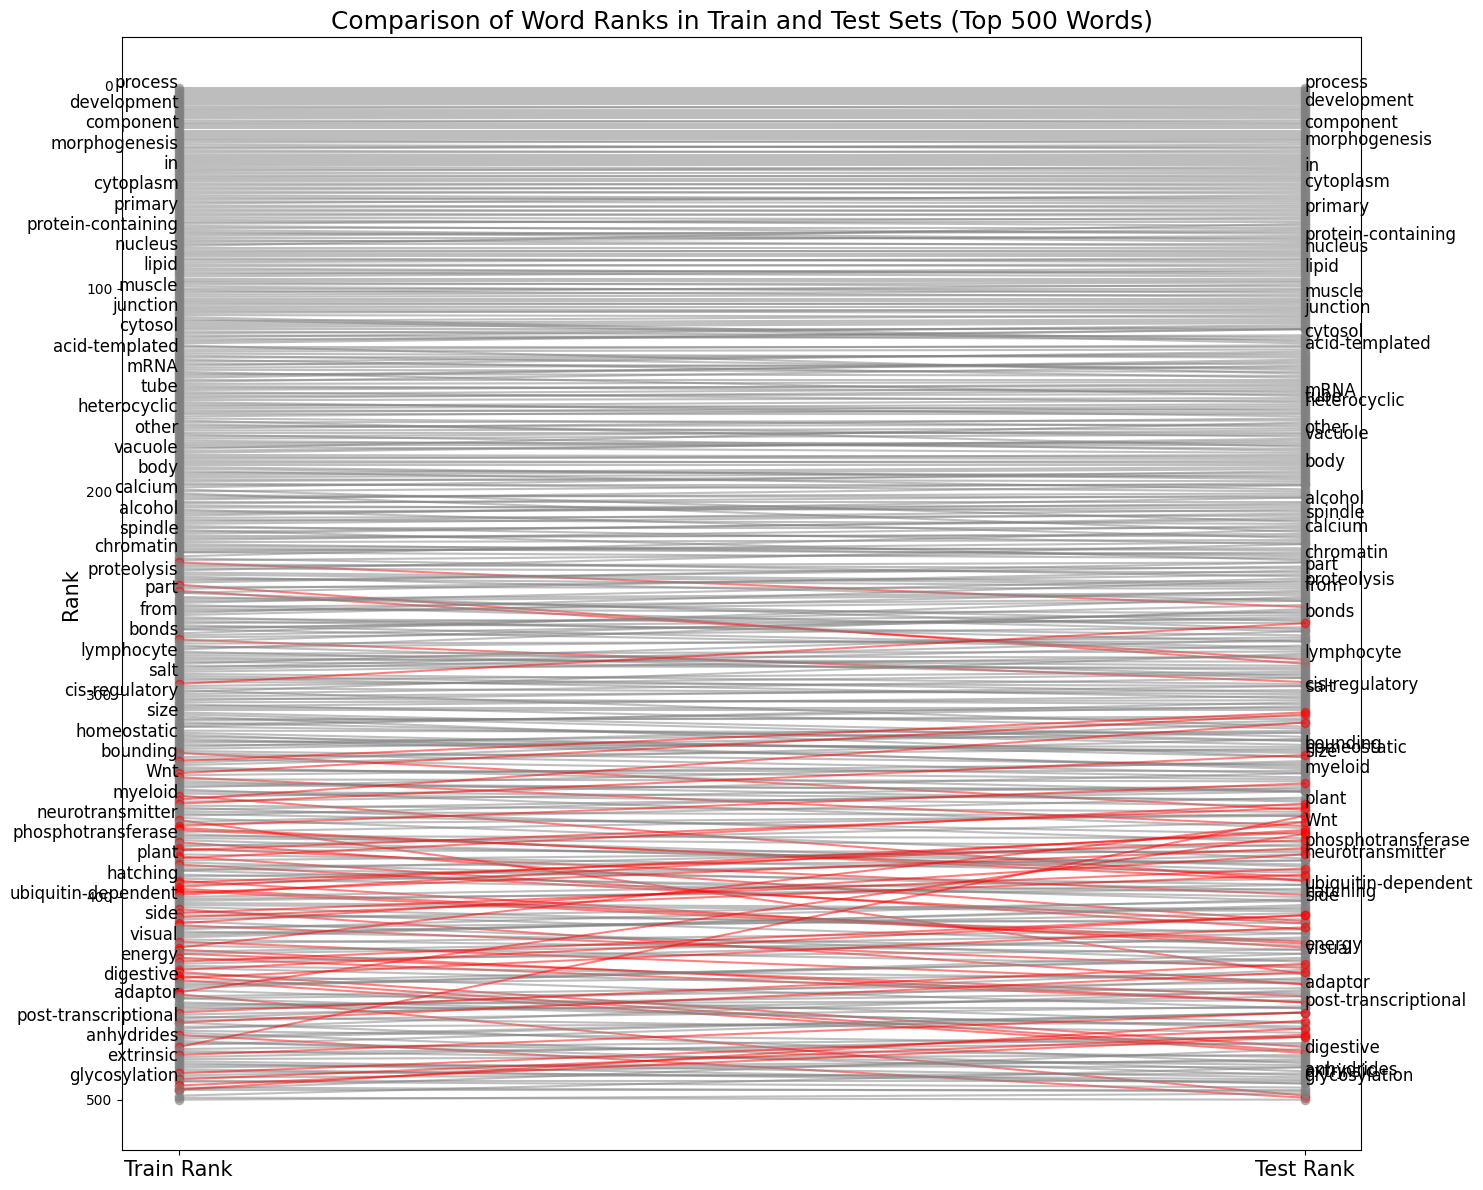

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the counts for each word in both train and test sets
train_counts = counts_token.loc['train'].sort_values(ascending=False)
test_counts = counts_token.loc['test'].sort_values(ascending=False)

# Get the top 500 words based on the training set counts
top_500_train_words = train_counts.head(500)

# Get ranks of the top 500 words in both train and test sets
train_ranks = top_500_train_words.rank(ascending=False, method='min')
test_ranks = test_counts[top_500_train_words.index].rank(ascending=False, method='min')

# Combine ranks into a DataFrame
rank_df = pd.DataFrame({'Word': top_500_train_words.index, 'Train Rank': train_ranks, 'Test Rank': test_ranks})

# Plotting
plt.figure(figsize=(15, 12))

# Draw lines connecting the ranks of each word in train and test sets
for i in range(len(rank_df)):
    # Calculate the absolute rank difference
    rank_difference = abs(rank_df['Train Rank'].iloc[i] - rank_df['Test Rank'].iloc[i])
    
    # Set line color based on rank difference
    line_color = 'red' if rank_difference > 20 else 'gray'
    
    # Plot the line with the selected color
    plt.plot([1, 2], [rank_df['Train Rank'].iloc[i], rank_df['Test Rank'].iloc[i]], 
             marker='o', color=line_color, alpha=0.5)

# Add labels and formatting
plt.xticks([1, 2], ['Train Rank', 'Test Rank'], fontsize=15)
plt.ylabel("Rank", fontsize=15)
plt.title("Comparison of Word Ranks in Train and Test Sets (Top 500 Words)", fontsize=18)

# Annotate a few words for clarity (optional)
for i in range(0, len(rank_df), 10):  # Annotate every 10th word for readability
    plt.text(1, rank_df['Train Rank'].iloc[i], rank_df['Word'].iloc[i], ha='right', fontsize=12)
    plt.text(2, rank_df['Test Rank'].iloc[i], rank_df['Word'].iloc[i], ha='left', fontsize=12)

plt.gca().invert_yaxis()  # Invert y-axis to have rank 1 at the top
plt.tight_layout()
plt.show()
